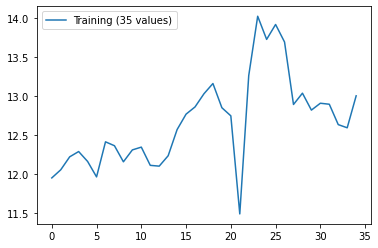

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.2340
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2164
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2041
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1941
Epoch 5/20
1/1 [==============================] - 0s 3ms/step - loss: 0.1855
Epoch 6/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1778
Epoch 7/20
1/1 [==============================] - 0s 5ms/step - loss: 0.1708
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1642
Epoch 9/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1581
Epoch 10/20
1/1 [==============================] - 0s 5ms/step - loss: 0.1523
Epoch 11/20
1/1 [==============================] - 0s 5ms/step - loss: 0.1468
Epoch 12/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1416
Epoch 13/20
1/1 [==============================] - 0s 3ms/step - loss: 0.1

In [7]:
#https://github.com/codificandobits/prediction_de_acciones_en_la_bolsa_con_redes_LSTM
import numpy as np
np.random.seed(4) #Always the same random values (stored in position 4)
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Data read
dataset = pd.read_csv('dataset_14_08_2002.csv')
dataset.head()

training_set = dataset[:].iloc[:,1:2]

training_set['GB'].plot(legend=True)
plt.legend(['Training (35 values)'])
plt.show()

# training_set normalisation 
sc = MinMaxScaler(feature_range=(0,1))
scalar_training_set = sc.fit_transform(training_set)

time_step = 5  #Number of consecutive data
X_train = []
Y_train = []
m = len(scalar_training_set)

for i in range(time_step,m):
    # X: blocks of "time_step" values: 0-time_step, 1-time_step+1, 2-time_step+2...
    X_train.append(scalar_training_set[i-time_step:i,0])

    # Y: next value
    Y_train.append(scalar_training_set[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train (for Keras)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# LSTM
dim_in = (X_train.shape[1],1)
dim_out = 1
na = 10

model = Sequential()
model.add(LSTM(units=na, input_shape=dim_in))
model.add(Dense(units=dim_out))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train,Y_train,epochs=20,batch_size=32)

#Validation (prediction)
time_step = 5
X_test = []
Y_test = []
m = len(scalar_training_set)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_test.append(scalar_training_set[i-time_step:i,0])

    # Y: el siguiente dato
    Y_test.append(scalar_training_set[i,0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#print(X_test)

prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)

# print(prediction)

# Single prediction:

five_steps = np.array([[[1.0], [2.0], [3.0], [4.0], [5.0]]])
prediction = model.predict(five_steps)
prediction = sc.inverse_transform(prediction)

#print(\"La prediccion del siguiente paso dados los cinco previos pasos {} es:\".format(five_steps), prediction)
print("Next prediction (given five previous steps):", prediction)

In [ ]:
#Real value (18:55) = 12.9323647